# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This is the capstone project from the Google Advanced Data Analytics Certificate (Course 7). It involves analyzing a dataset and building predictive models that can provide insights to the Human Resources department of a large consulting firm.

The deliverables will include the model evaluation (and interpretation if applicable), data visualizations that are directly related to the questions asked, ethical considerations, and the resources used to troubleshoot and find answers or solutions.

# **PACE Stages**


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have referred to me as a data analytics professional and asked me to provide data-driven suggestions. They have the following question: **What’s likely to make the employee leave the company?**

The goal of this project is to analyze the data collected by the HR department and to build a model that predicts whether an employee will leave the company. 

### Data Dictionary 

The dataset contains 14,999 rows and 10 variables. Many thanks and acknowledgement to Faisal Qureshi, who provided the data to the Certificate course. Please visit  https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv for more information.

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether the employee experienced an accident while at work
left|Whether the employee left the company
promotion_last_5years|Whether the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (low, medium, or high, based on U.S. dollars)

## Step 1. Imports and Data Loading

### Import Packages

In [217]:
# Import packages
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

### Load Dataset

In [219]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and Data Cleaning)


### Step 2a Gather Basic Information

In [222]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [223]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Step 2b Data Cleaning - Missing Values, Rename Columns, Encode Variables.

In [225]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [226]:
# Rename columns as needed
df0.rename(columns={'last_evaluation': 'last_eval_score',
                   'number_project': 'nbr_projects', 
                   'time_spend_company': 'tenure',
                   'average_montly_hours': 'average_monthly_hours', 
                   'left': 'left_company'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_eval_score', 'nbr_projects',
       'average_monthly_hours', 'tenure', 'Work_accident', 'left_company',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [227]:
# Map the salary variable to 0, 1, 2
df0['salary_new'] = df0['salary'].map({"low": 0, "medium": 1, "high": 2})
df0[['salary', 'salary_new']].head()

,salary,salary_new
0,low,0
1,medium,1
2,medium,1
3,low,0
4,low,0


### Check missing values

In [229]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_eval_score          0
nbr_projects             0
average_monthly_hours    0
tenure                   0
Work_accident            0
left_company             0
promotion_last_5years    0
Department               0
salary                   0
salary_new               0
dtype: int64

In [230]:
# Check for missing values
df0.isnull().any().sum()

0

### Check duplicates

In [232]:
# Check for duplicates
df0.duplicated().sum()

3008

In [233]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_eval_score,nbr_projects,average_monthly_hours,tenure,Work_accident,left_company,promotion_last_5years,Department,salary,salary_new
396,0.46,0.57,2,139,3,0,1,0,sales,low,0
866,0.41,0.46,2,128,3,0,1,0,accounting,low,0
1317,0.37,0.51,2,127,3,0,1,0,sales,medium,1
1368,0.41,0.52,2,132,3,0,1,0,RandD,low,0
1461,0.42,0.53,2,142,3,0,1,0,sales,low,0


I have detected duplicates in the data, but they don't appear to be exact duplicates. 'satisfaction_level' and 'last_eval_score' are not exact duplicates due to floating point rounding. Nonetheless, it is best practice in this case to delete the duplicates. The Certificate course deleted duplicates as well.

In [235]:
# Drop duplicates and save resulting dataframe as a new dataframe.
df1 = df0.drop_duplicates(keep='first')

In [236]:
# Display the shape of df1 to see the decreased row count
df1.shape[0]

11991

### Check Outliers

In [238]:
# Determine the number of rows containing outliers 
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)
# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Print how many rows contain outliers in `tenure`
print("Number of rows containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in `tenure`: 824


#### Boxplot showing distribution of 'tenure'

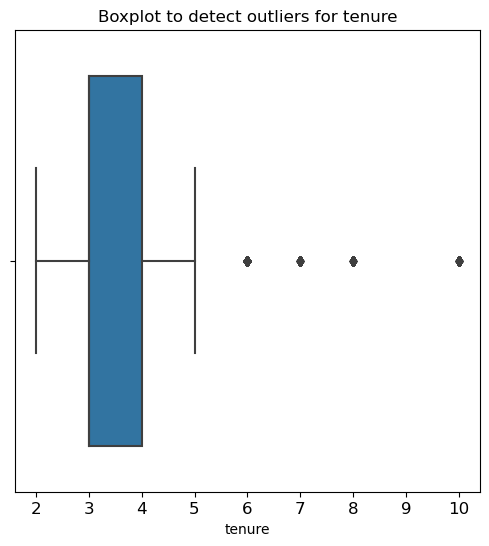

In [240]:
# Boxplot to visualize distribution of `tenure` and detect outliers
plt.figure(figsize=(6,6))
sns.boxplot(x=df1['tenure'])
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [241]:
# Drop outliers
df2  = df1[(df1['tenure'] >= lower_limit) & (df1['tenure'] <= upper_limit)]

In [242]:
# Display decreased number of rows in df2 after dropping outliers
df2.shape[0]

11167

We see above that the 824 rows with outliers in 'tenure' have been dropped (11991 - 824 = 11167). This situation suggests that employees tend to leave the organization after 5 yreas of tenure.

# PACE: Analyze Stage
- Perform EDA  



### Step 2c. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [246]:
# Get numbers of people who left vs. stayed
print('Numbers of people who stayed and left company')
print('0 = stayed, 1 = left')
print()
print(df2['left_company'].value_counts())
print()

# Get percentages of people who left vs. stayed
print('Percentages of people who stayed and left company')
print(df2['left_company'].value_counts(normalize=True))

Numbers of people who stayed and left company
0 = stayed, 1 = left

left_company
0    9285
1    1882
Name: count, dtype: int64

Percentages of people who stayed and left company
left_company
0    0.831468
1    0.168532
Name: proportion, dtype: float64


We see from the above that roughly 17% of employees left the company.

In [248]:
# Look at the Work_accident variable in relation to the histogram below
df2['Work_accident'].value_counts(normalize=True)

Work_accident
0    0.847587
1    0.152413
Name: proportion, dtype: float64

We see here that roughly 16% of employees who had a work related accident left the company, nearly the same percentage as those who left the company in general. But further investigation would be needed to confirm a correlation between 'Work_accident' and 'left_company'.

### Step 3 Data visualizations

#### 'satisfaction_level' vs 'last_eval_score'

Text(0.5, 1.0, 'satisfaction_level vs. last_eval_score')

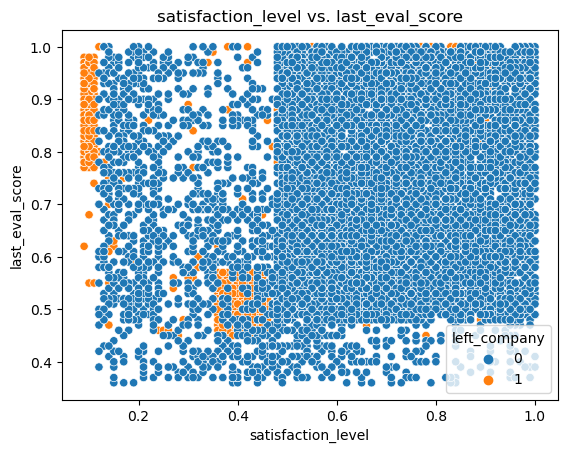

In [252]:
# Create scatterplot of 'satisfaction_level vs. last_eval_score'
sns.scatterplot(data=df2, x='satisfaction_level', y='last_eval_score', hue='left_company')
plt.title('satisfaction_level vs. last_eval_score')

Unfortunately, I don't see any meaningful correlation between these variables as I thought there would be. It's odd that there is a blcok of employees with evaluation scores between 80% and 100% with satifaction levels below 205. 

#### 'average_monthly_hours' vs 'satisfaction_level' 

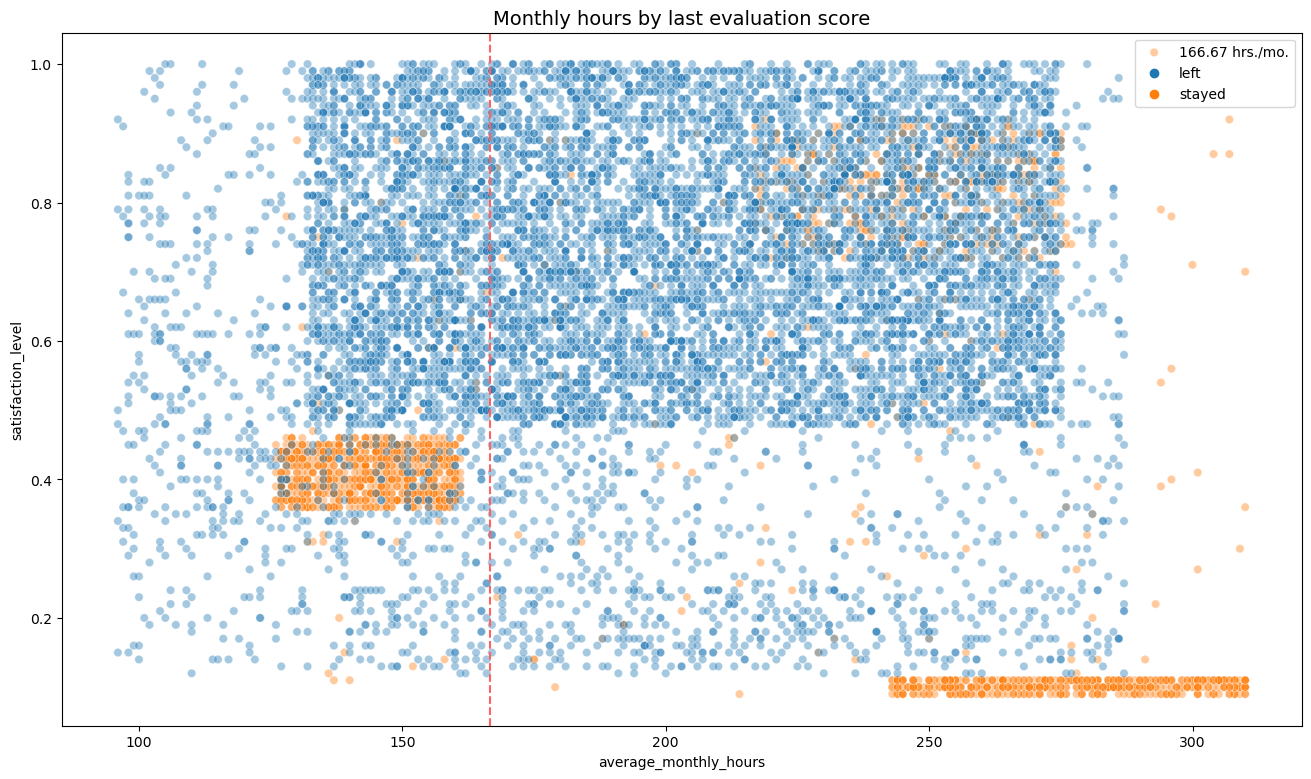

In [255]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df2, x='average_monthly_hours', y='satisfaction_level', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

This scatterplot is more informative. It shows that there is a sizeable group of employees who worked roughly between 240 and 315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to these employee's satisfaction levels being close to zero. 

There is also a group who worked  around 210 to 280 hours per month, and they had satisfaction levels ranging ~0.7& to 0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

#### Churn rate by last_eval_score

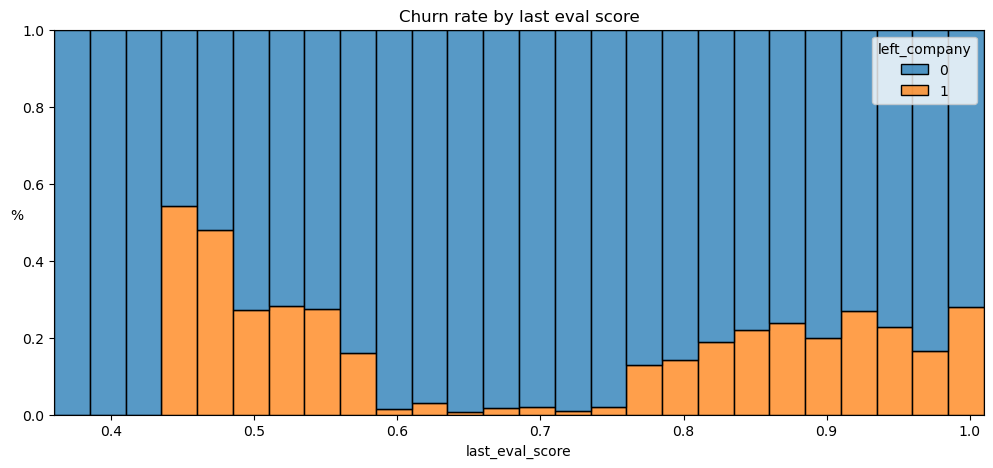

In [258]:
# Churn rate by last_eval_score
plt.figure(figsize=(12,5))
sns.histplot(data=df2,
             x='last_eval_score',
             binwidth=0.025,
             hue='left_company',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by last eval score');

The above seems to make a little bit of sense. Churn rate is higher for individuals who had work evaluation scores between approximately 45% and 60%. Churn rate is also higher between roughly 80% and 100%. It could be those employees with good scores decided to take advantage of that and look for better employment. But more information would be needed to confirm this particular estimation.  

#### 'Work_accident' vs. 'left_company'

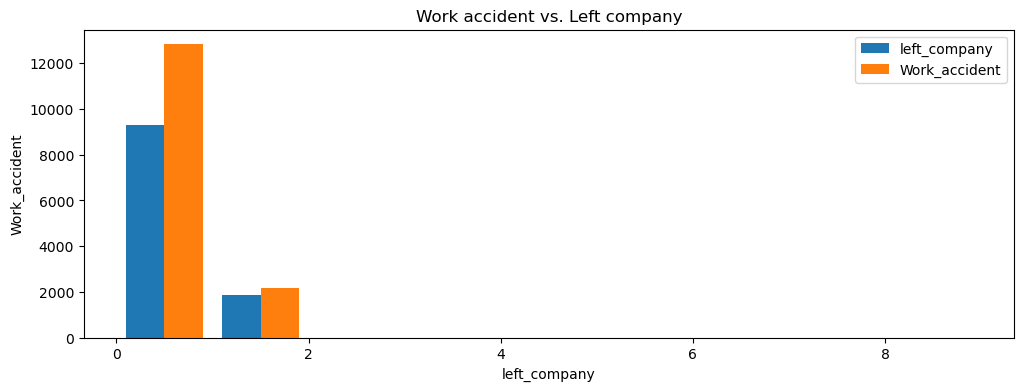

In [261]:
# Side by side histogram - Work accident vs. Left company
plt.figure(figsize=(12,4))
label=['left_company', 'Work_accident']
plt.hist([df2['left_company'], df0['Work_accident']],
         bins=range(0,10),
         label=label)
plt.xlabel('left_company')
plt.ylabel('Work_accident')
plt.legend()
plt.title('Work accident vs. Left company');

This shows that the number of those who left the company (1) is closer to the number of those who had a work accident than is the number of those who stayed (0) is to that same variable. Of course, it would seem that the number of work accidents for those who stayed (0) should be much less, not more. 

#### 'promotion_last_5years' vs. 'left_company'

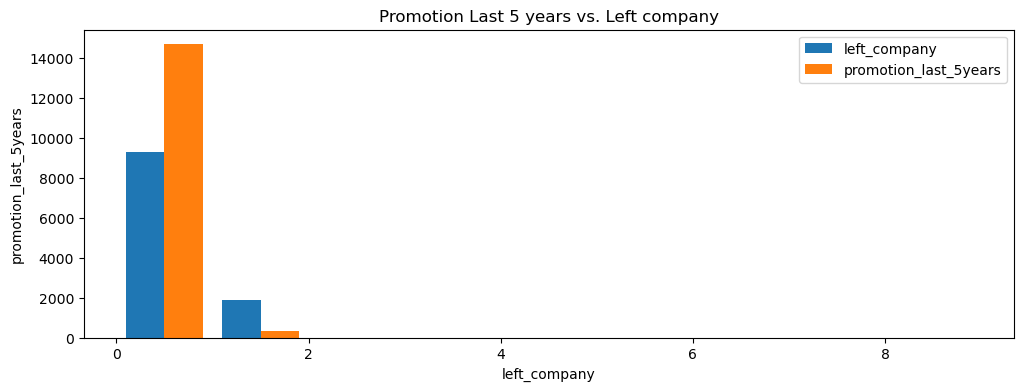

In [264]:
# Promotion Last 5 years vs. Left company
plt.figure(figsize=(12,4))
label=['left_company', 'promotion_last_5years']
plt.hist([df2['left_company'], df0['promotion_last_5years']],
         bins=range(0,10),
         label=label)
plt.xlabel('left_company')
plt.ylabel('promotion_last_5years')
plt.legend()
plt.title('Promotion Last 5 years vs. Left company');

We see here that the value for 'promotions_in_last_5years"  is high for employees who remained with the company, and low for those who left. This makes sense.

#### Churn rate by 'average_monthly_hours'

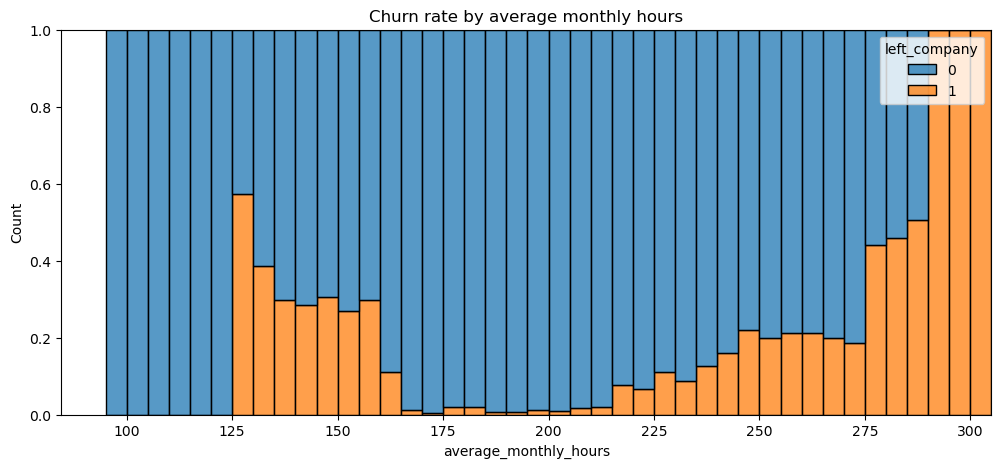

In [267]:
# Plot - Churn rate by average monthly hours
plt.figure(figsize=(12,5))
sns.histplot(data=df2,
             x='average_monthly_hours',
             bins=range(0,310,5),
             hue='left_company',
             multiple='fill')
plt.title('Churn rate by average monthly hours');

This suggests that people who work excessive hours during the month are more likely to leave the organization (above 275 hours per month, or roughly a 12 hour work day every working day of the month leads to a 40% instance of that person leaving the company.

#### Chrun rate by 'nbr_projects'

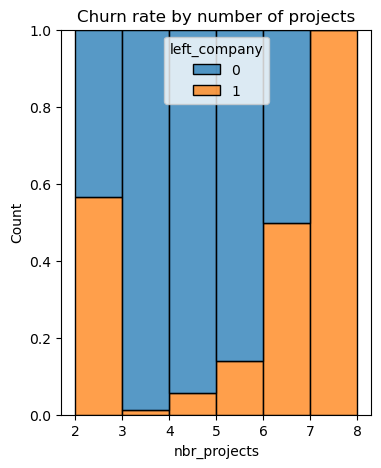

In [270]:
# Plot - Churn rate by number of projects
plt.figure(figsize=(4,5))
sns.histplot(data=df2,
             x='nbr_projects',
             bins=range(0,20,1),
             hue='left_company',
             multiple='fill')
plt.title('Churn rate by number of projects');

Here we see that people who work an excessive number of projects leave the company. People working on 7-8 projects have a 100% churn rate. Those working 6 to 7 projects per month have roughly a 50% churn rate. It's strange that employees working on 2-3 projects have a roughly 58% exit rate. This may be cause for further investigation.

#### Distribution of average monthly hours

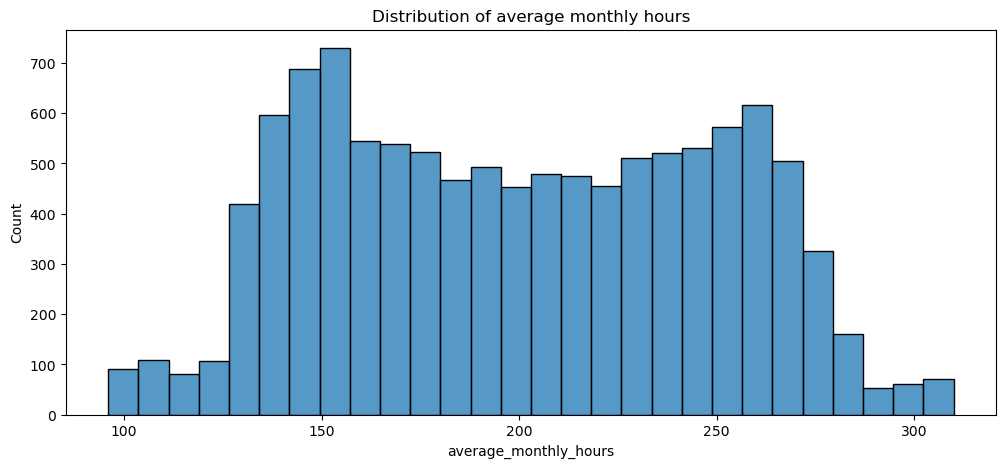

In [273]:
# Plot - Distribution of average monthly hours
plt.figure(figsize=(12,5))
sns.histplot(x=df2['average_monthly_hours'])
plt.title('Distribution of average monthly hours');

A majority of employees at this company appear to work around 150 hours per month (roughly 7 hours every working day of the month). We see a good portion of people work between 200 and 250 hours per month on average (9 to 10 hours per work day every day of the month). It would seem the employees are over worked!

#### Distribution of last eval score

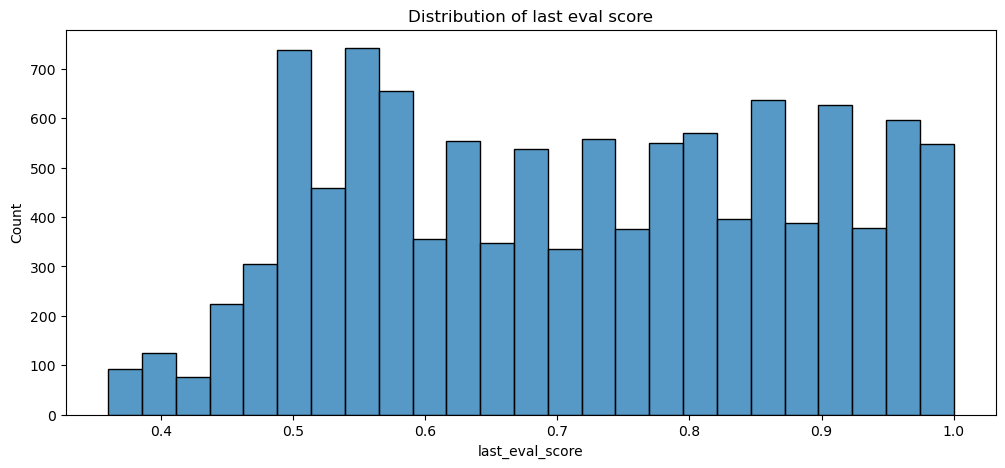

In [276]:
# Plot - Distribution of last eval score
plt.figure(figsize=(12,5))
sns.histplot(x=df2['last_eval_score'])
plt.title('Distribution of last eval score');

Quite a few people have work evaluation scores under 60%. But there are also quite a fair amount above that figure as well.

#### Percentage of employees by Department

In [279]:
# Percentage of employees by Department
df2['Department'].value_counts(normalize=True)

Department
sales          0.268380
technical      0.189308
support        0.154115
IT             0.081938
RandD          0.058118
product_mng    0.057401
marketing      0.055252
accounting     0.052207
hr             0.051043
management     0.032238
Name: proportion, dtype: float64

##### Sales, technical, and support make up over half of the company's personnel. 
#### Pie chart showing salary breakdwon

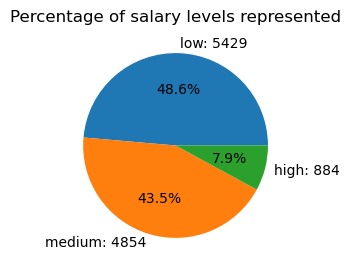

In [281]:
# Pie chart showing salary breakdwon
fig = plt.figure(figsize=(3,3))
data=df2['salary'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}'],
        # Gemini has a way to iterate over the value_counts 
        autopct='%1.1f%%'
        )
plt.title('Percentage of salary levels represented');

Employees earning low and medium salaries make up over 92% of personnel

#### Churn rate by department

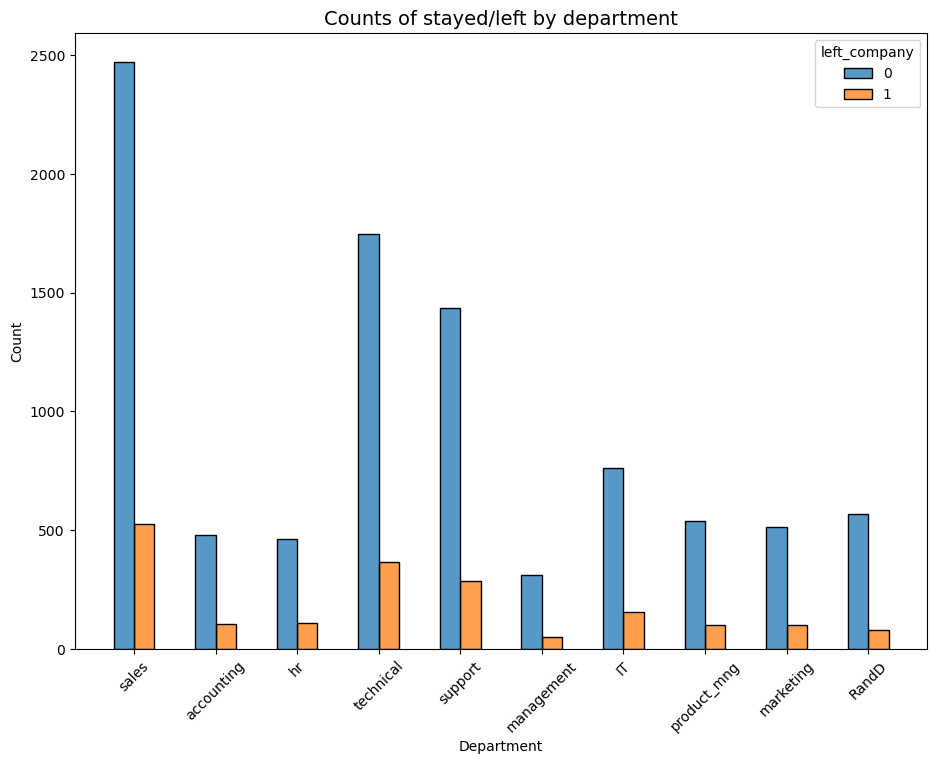

In [284]:
# Create stacked histogram to compare department distribution of employees who left to
# that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df2, x='Department', hue='left_company', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Now check for strong correlations between variables in the data.

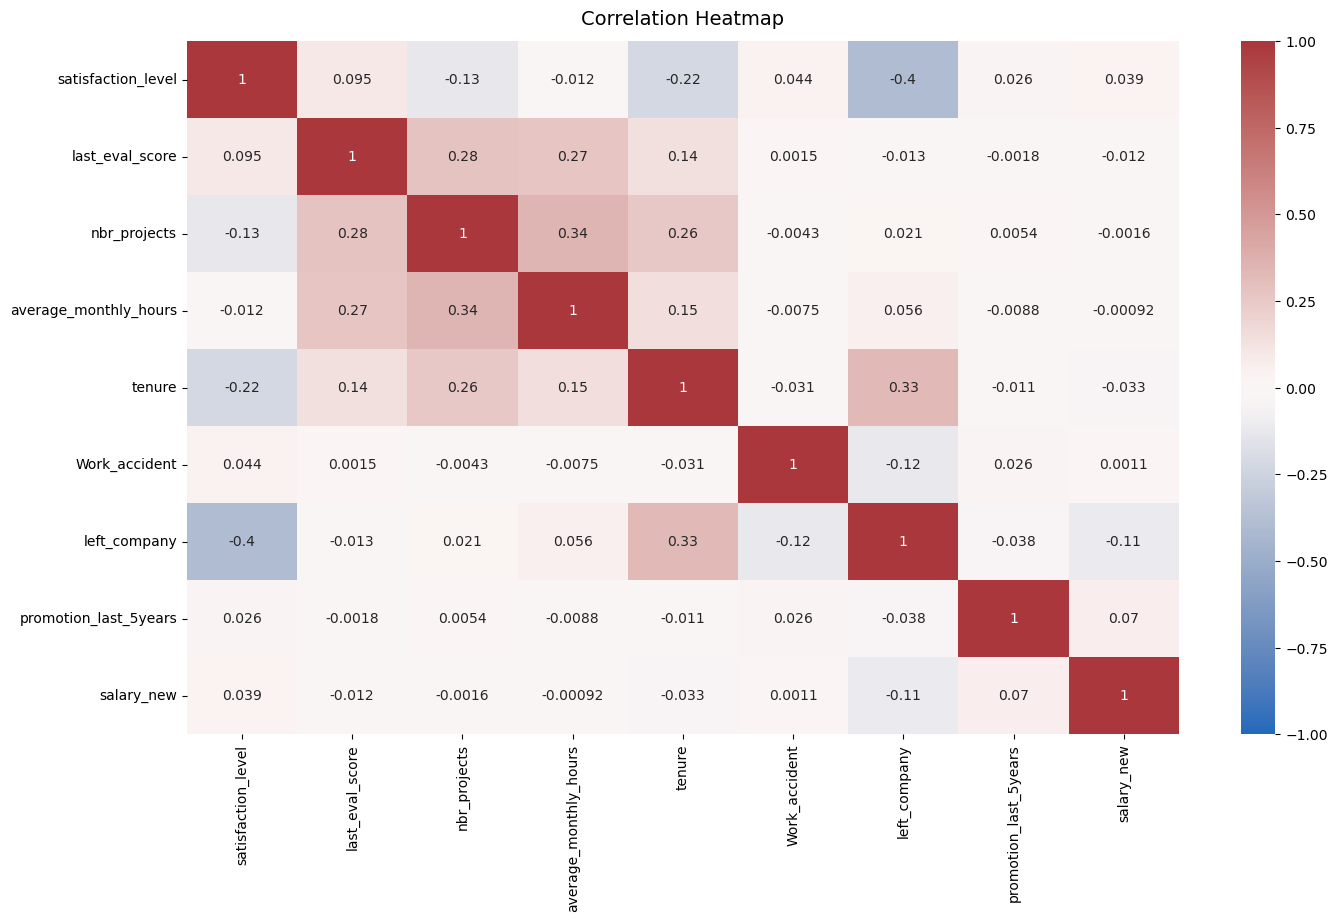

In [286]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))

heatmap = sns.heatmap(df2[['satisfaction_level', 'last_eval_score', 'nbr_projects', 'average_monthly_hours', 'tenure',
                 'Work_accident', 'left_company', 'promotion_last_5years', 'salary_new']]
          .corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, average monthly hours worked, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. 

# PACE: Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Evaluate model results to determine how well your model fits the data


## Step 4. Model Building

#### Step 4a Random Forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters (Note here that for clarity I'm using the best hyperparameters already determine having worked the project in the Certificate course). 

First split the data.

In [295]:
# 1. Isolate X variables
X = df2.drop(['salary', 'Department', 'left_company'], axis=1)

# 2. Isolate y variable
y = df2['left_company']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
    random_state=26)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25,
    random_state=26)

In [296]:
# Display the number of records in X_train, X_val , and X_test
for x in [X_train, X_val , X_test]:
    print(len(x))

6699
2234
2234


Define the scoring function to use with GridSearchCV, then instantiate and fit the model.

In [298]:
# Custome scroing function
def custom_scoring(estimator, X, y):
    auc = roc_auc_score(y, estimator.predict(X))
    f1 = f1_score(y, estimator.predict(X))
    precision = precision_score(y, estimator.predict(X))
    recall = recall_score(y, estimator.predict(X))
    accuracy = accuracy_score(y, estimator.predict(X))
    
    return {'auc': auc, 'f1': f1, 'precision': precision, 'recall': recall, 'accuracy': accuracy}

In [299]:
%%time
# Instantiate model
rf = RandomForestClassifier(random_state=26)

# Assign dictionary of hyperparameters
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [4],
             'n_estimators': [500],
             }  

# Instantiate GridSearch
rf1_cv = GridSearchCV(rf, cv_params, scoring=custom_scoring, cv=4, refit='auc')

CPU times: total: 0 ns
Wall time: 0 ns


In [300]:
%%time
rf1_cv.fit(X_train, y_train) 

CPU times: total: 13.6 s
Wall time: 13.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=26),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [4], 'n_estimators': [500]},
             refit='auc',
             scoring=<function custom_scoring at 0x000001C620A1E980>)

Here I'm displaying all the model scoring results (cv_results_), as the Python code I worked with in the Coursera platform would not execute in my version of Anaconda. Additionally, it's interesting to see the plethora of metrics available for study.

In [302]:
# Print the cv_results dictionary for the fit rf1_cv model.
print(rf1_cv.cv_results_)

{'mean_fit_time': array([2.24797666]), 'std_fit_time': array([0.02154291]), 'mean_score_time': array([0.49467665]), 'std_score_time': array([0.01587928]), 'param_max_depth': masked_array(data=[5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[1.0],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_samples': masked_array(data=[0.7],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[4],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[500],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_sampl

Display as a dataframe the best score (AUC), and mean test scores for f1, precision, recall, and accuracy, for the training data.

In [304]:
# Display as a dataframe the best score (AUC), and mean test scores on rf1_cv

auc = rf1_cv.best_score_
mean_test_f1 = rf1_cv.cv_results_['mean_test_f1']
f1 = mean_test_f1[0]
mean_test_precision = rf1_cv.cv_results_['mean_test_precision']
precision = mean_test_precision[0]
mean_test_recall = rf1_cv.cv_results_['mean_test_recall']
recall = mean_test_recall[0]
mean_test_accuracy = rf1_cv.cv_results_['mean_test_accuracy']
accuracy = mean_test_accuracy[0]

rf1_train_scores = pd.DataFrame({'model': 'random forest 1 train',
                          'AUC': [auc],
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]})
                          
# Dispaly the training scores from rf1_cv.
rf1_train_scores

,model,AUC,f1,precision,recall,accuracy
0,random forest 1 train,0.958412,0.943464,0.964092,0.923825,0.98134


The function below extracts all the scores from a model's predictions on the test data.

In [306]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'AUC': [auc],
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]
                          
                         })
  
    return table

Now use the fucntion to predict on the test data. Concatenate the training scores dataframe from above with the test dataframe into a new dataframe for ease of comparison.

In [308]:
# Get predictions on test data.
rf1_test_scores = get_scores('random forest1 1 test', rf1_cv, X_test, y_test)

# Concatenate training scores dataframe  for ease of comparison.
summary_scores = pd.concat([rf1_train_scores, rf1_test_scores], axis=0)

# Print the summary scores
summary_scores

,model,AUC,f1,precision,recall,accuracy
0,random forest 1 train,0.958412,0.943464,0.964092,0.923825,0.981340
0,random forest1 1 test,0.949293,0.935528,0.968750,0.904509,0.978962


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, we can be more confident that the model's performance on this data is representative of how it will perform on new, unseeen data.

#### Step 4b Feature Engineering

There is a chance that some data leakage may be occurring. Training a model with leaked data can give an unrealistic score.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that 'average_monthly_hours' contains data for employees who have already decided to leave the organization, or have already been identified as people to be terminated. These individuals may be working fewer hours. 

The first random forest model included all variables (except 'Department') as features. The next model will incorporate an engineered feature to increase the model's performance. 

I will create a new feature that roughly captures whether an employee is overworked. The feature will be a binary variable called 'overworked'.

In [312]:
# Inspect max and min average monthly hours values
print('Max hours:', df2['average_monthly_hours'].max())
print('Min hours:', df2['average_monthly_hours'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day (2000 hours divided by 12 months). 

I will define being overworked as working more than 175 hours per month on average.

In [358]:
# Define `overworked` as working > 175 hrs per month
df2.loc[:, 'overworked'] = (df2.loc[:, 'average_monthly_hours'] > 175).astype(int)

# Display first few rows of new column
df2[['average_monthly_hours', 'overworked']].head()

,average_monthly_hours,overworked
0,157,0
2,272,1
3,223,1
4,159,0
5,153,0


Drop 'average_monthly_hours' to reduce multicollinearity with the variable that was directly engineered from it ('overworked'). Let's drop 'satisfaction_level' as well as it semmds to be collinear with 'average_monthly_hours.'  


In [647]:
# Drop the `average_monthly_hours` and 'satisfaction_level' columns
# df2 = df2.drop(['average_monthly_hours', 'satisfaction_level'], axis=1)
df2 = df2.drop(['satisfaction_level', 'average_monthly_hours'], axis=1)

# Display info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_eval_score        11167 non-null  float64
 1   nbr_projects           11167 non-null  int64  
 2   tenure                 11167 non-null  int64  
 3   Work_accident          11167 non-null  int64  
 4   left_company           11167 non-null  int64  
 5   promotion_last_5years  11167 non-null  int64  
 6   Department             11167 non-null  object 
 7   salary                 11167 non-null  object 
 8   salary_new             11167 non-null  int64  
 9   overworked             11167 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(2)
memory usage: 916.0+ KB


#### Step 5 Random Forest - Round 2

Create the training and test datasets for the second round of random forest modeling (Note in the Certificate course, this section did not create a validation set, even though GridSearchCV is being utilized. Therefore I have not created one here). 

In [650]:
# 1. Isolate X variables
X = df2.drop(['salary', 'Department', 'left_company'], axis=1)

# 2. Isolate y variable
y = df2['left_company']

# 3. Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, 
    random_state=26)

In [651]:
# Display the number of records in X_train and X_test
for x in [X_train, X_test]:
    print(len(x))

8375
2792


Now instantiate and fit the model (Note again for clarity I'm using the best hyperparameters obtained from working the course).

In [653]:
%%time
# Instantiate model
rf = RandomForestClassifier(random_state=26)

# Assign dictionary of hyperparameters
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }  

# Instantiate GridSearch
rf2_cv = GridSearchCV(rf, cv_params, scoring=custom_scoring, cv=4, refit='auc')

CPU times: total: 0 ns
Wall time: 0 ns


In [654]:
%%time
rf2_cv.fit(X_train, y_train)  

CPU times: total: 6.58 s
Wall time: 6.57 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=26),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='auc',
             scoring=<function custom_scoring at 0x000001D16CE1A480>)

Now display the best parameters.

In [656]:
# Check best params
rf2_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Again, display a dataframe of the training data scores. Then concatenate this datafram with the summary_scores dataframe.

In [706]:
# Display as a dataframe the best score (AUC), and mean test scores on rf2_cv

auc = rf2_cv.best_score_
mean_test_f1 = rf2_cv.cv_results_['mean_test_f1']
f1 = mean_test_f1[0]
mean_test_precision = rf2_cv.cv_results_['mean_test_precision']
precision = mean_test_precision[0]
mean_test_recall = rf2_cv.cv_results_['mean_test_recall']
recall = mean_test_recall[0]
mean_test_accuracy = rf2_cv.cv_results_['mean_test_accuracy']
accuracy = mean_test_accuracy[0]

rf2_train_scores = pd.DataFrame({'model': 'random forest 2 train',
                          'AUC': [auc],
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]
                          
                         })
  
# Concatenate training scores dataframe  for ease of comparison.
summary_scores = pd.concat([summary_scores, rf2_train_scores], axis=0)

# Print the summary scores
summary_scores

,model,AUC,f1,precision,recall,accuracy
0,random forest 1 train,0.958412,0.943464,0.964092,0.923825,0.981340
0,random forest1 1 test,0.949293,0.935528,0.968750,0.904509,0.978962
0,random forest 2 train,0.945145,0.903120,0.894345,0.912117,0.967045


The training scores dropped lower than the test scores from random forest round 1, but not by much. In the Certificate, the second random forest performed better than the first if using AUC as the deciding metric. This is cause for further investigation. This could be the result of differences in the Coursera environment and my Anaconda environment. I have also had to modify my code from the Coursera version so it would execute without errors in Anaconda.

Let's score the final model rf2_cv on the test set now.

In [709]:
# Get predictions on test data. 
rf2_test_scores = get_scores('random forest 2 test', rf2_cv, X_test, y_test)

# Concatenate this dataframe with the summary_scores dataframe
summary_scores = pd.concat([summary_scores, rf2_test_scores], axis=0)

# Display all scores
summary_scores

,model,AUC,f1,precision,recall,accuracy
0,random forest 1 train,0.958412,0.943464,0.964092,0.923825,0.981340
0,random forest1 1 test,0.949293,0.935528,0.968750,0.904509,0.978962
0,random forest 2 train,0.945145,0.903120,0.894345,0.912117,0.967045
0,random forest 2 test,0.935104,0.896257,0.903017,0.889597,0.965258


The random forest round 1 seems to be a stable, well-performing final model. The training and test scores for round 2 dropped, which was not the case in the Certificate course. 

In any event, plot a confusion matrix to visualize how well random forest round 2 predicts on the test set.

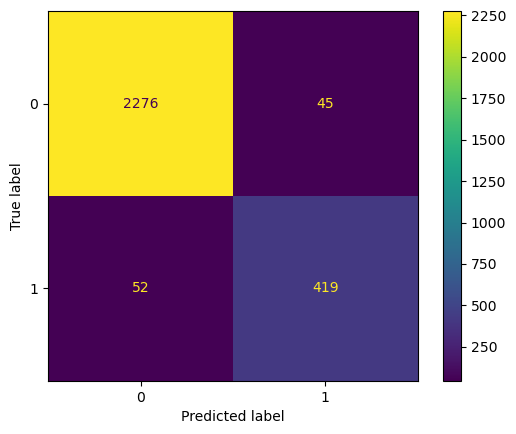

In [712]:
# Generate array of values for confusion matrix
preds = rf2_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2_cv.classes_)
disp.plot(values_format='');

We see from above that random forest round 2 correctly predicted 2,276 employees would stay with the company, and 419 would leave. The model incorrectly predicted that 52 people would stay, and 45 would leave. Looking at the matrix in a percentage-wise basis, only about 3.5% of the total rows were incorrectly identified. And the AUC, f1, precision, recall, and accuracy weren't terribly lower than random forest 1.

#### Random forest feature importance

Let's now check the feature importances for the second random forest model rf2_cv.

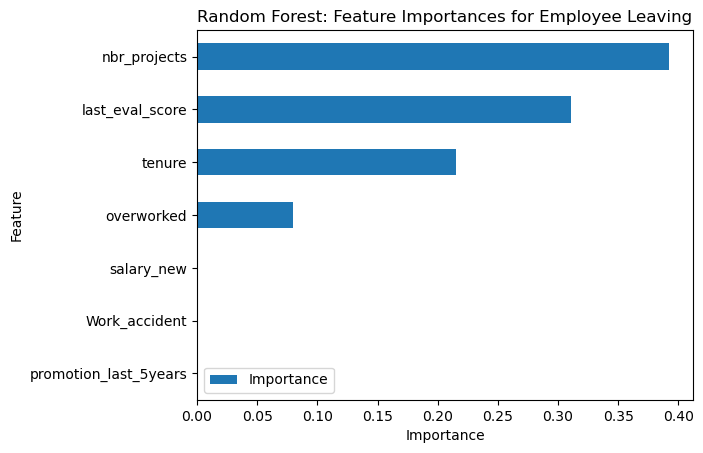

In [716]:
# Get feature importances
feat_impt = rf2_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2_cv.best_estimator_.feature_importances_, -7)[-7:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, 'nbr_projects', 'last_evaluation', `tenure`, and 'overworked' have the highest importance, in that order. These variables are most helpful in predicting the outcome variable.

# PACE: Execute Stage

## Step 6. Results and Evaluation

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation into why employees with 6 years or moreyear tenure are outliers (very few employees stay with the company more than 6 years). 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when 'last_evaluation' is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to try to predict on evaluation scores (use this value to predict whether a person will leave the company). The same could be said for satisfaction score. 

For another project, we could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 